## Funciones de distribucion de probabilidades

##Distribucion Uniforme

In [40]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2018)

In [ ]:
a = 1 #minimo
b= 100 #maximo
n = 1000000 #cantidad de numeros
#Genera numeros aleatorios generados de manera uniforme
data = np.random.uniform(a, b, n) #distribucion uniforme

In [ ]:
#pinta el diagrama de numeros
%matplotlib inline 
plt.hist(data) #tipo de grafico histograma

#Distribucion normal - "BELL CURVE" - La Campana de Gauss

## La funcion randn genera una distribucion normal estandar, es decir con media 0 (verticalmente el eje) y desviacion tipica 1 (la acumulacion de mas datos en este rango).  -1,0,1 expresado en coordenadas

In [ ]:
data = np.random.randn(1000000) 

In [ ]:
x = range(1 , 1000001)
plt.plot(x, data)

In [ ]:
%matplotlib inline 
plt.hist(data)

In [ ]:
plt.plot(x, sorted(data)) #pinta los datos ordenados

#(PARA GENERAR UNA DISTRIBUCION NORMAL SOLAMENTE HAY QUE REALIZAR UNA ECUACION)


In [ ]:
mu = 5.5 #media
sd = 2.5 #desviacion estandar 2.5 puntos arriba y 2.5 puntos abajo
z_10000 = np.random.randn(10000) #variable aleatoria
data = mu + sd * z_10000  # MEDIA + DESVIACION ESTANDAR * VARIABLE ALEATORIA
plt.hist(data)

#La funcion randn puede devolver n colecciones de n elementos on randn(2,4) estoy devolviendo 2 colecciones con 4 elementos

# La simulacion de Monte Carlo

Leyenda de Monte Carlo, el metodo se le ocurrio a jhon von newman mientras estaba enfermo y el tio en monte carlo jugaba al solitario con el..
Tiene que ver con juegos de azar la ciudad de Monaco..

Calculo de valor exacto de PI
Un circulo de radio **r** y el radio sera fijo y conocido. El circulo estara dentro de un cuadrado de lado **2r**.

**Problema:** Cual es la probabilidad que si elijo un punto cualquiera al azar dentro del cuadrado caiga dentro del circulo

P(Caer en el circulo) = caer dentro del circulo / caer dentro del cuadrado
= area circulo / area cuadrado 
= **PI**  / 4 (simplificado de las 2 areas usando radio)

**Solucion:** Al lograr el resultado final solo hace falta multiplicarlo por 4 para encontrar en valor de **PI**

* Generamos dos numeros aleatorios uniforme x e y entre 0 y 1

* Calcularemos x * x + y * y (formula del circulo)

* Si el valor es inferior a 1 estamos dentro del circulo

* Si el valor es superior a 1 estamos fuera del circulo

* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caere dentro del circulo.

* Usamos dicha probabilidad para aproximar el valor de PI

* Repetimos el experimento un numero suficiente de veces (por ejemplo), para obtener (1000) diferentes aproximaciones de PI.

* Calculamos el promedio de los 1000 experimentos anteriores para dar un valor final de PI.

In [45]:
#para que esto funcione tienen que ser la variable aleatoria, tienen que ser los numeros x igual de probables. Si fuera distribucion normal seria mas probable un grupo del conjunto
def pi_montecarlo(n, n_exp):
    pi_avg = 0 #variable
    pi_value_list = [] #array vacio
    
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist() #genero 1000 nros aleatorios de x entre 0 y 1
        y = np.random.uniform(0,1,n).tolist() #genero 1000 nros aleatorios de y entre 0 y 1
    
        for j in range(n): #de esos 1000 valores que eh generado voy calculando la formula
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            #si el numero obtenido es menor o igual que 1, sumamos uno al valor
            if z<=1:
                value += 1 #intentos que hemos hecho
            
        float_value = float(value) #convierte a valor en float
        pi_value = float_value * 4 /n #calculamos el valor de PI en base al valor obtenido
                                 #el resultado lo multiplico por 4 y lo divido por los casos posibles.
        pi_value_list.append(pi_value) #Agrego el valor de pi calculado a la lista con append
        pi_avg += pi_value
    
    pi = pi_avg/n_exp
    
    print("Valor aproximado final:", pi)
    fig = plt.plot(pi_value_list)  
    return (pi,fig)

Valor aproximado final: 3.1415512000000008


(3.1415512000000008, [<matplotlib.lines.Line2D at 0x221e4b3cf40>])

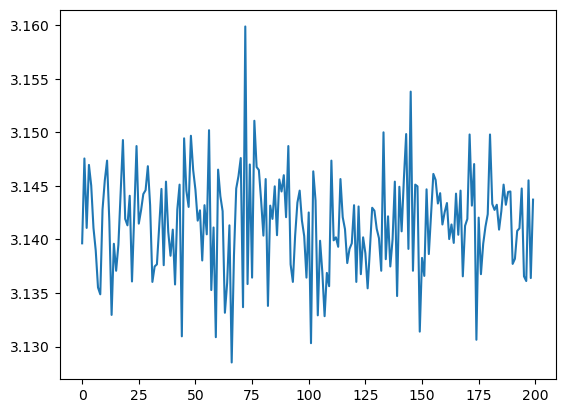

In [47]:
pi_montecarlo(100000, 200)